In [14]:
from matplotlib import pyplot as plt
import numpy as np
import os
import pandas
import sys

sys.path.append("../src")
import localmodule

In [15]:
data_dir = localmodule.get_data_dir()
dataset_name = localmodule.get_dataset_name()
annotations_name = "_".join([dataset_name, "annotations"])
annotations_dir = os.path.join(data_dir, annotations_name)
units = localmodule.get_units()
bin_start = -3
bin_stop = 3
n_bins = 51
bins = np.linspace(bin_start, bin_stop, n_bins)
normalizer = (n_bins-1) / (bin_stop-bin_start)

unit_y, unit_x = [], []
all_intervals = []

for unit_str in units:
    annotation_path = os.path.join(annotations_dir, unit_str + ".txt")
    df = pandas.read_csv(annotation_path, "\t")
    begin_times = np.array(df["Begin Time (s)"])
    end_times = np.array(df["End Time (s)"])
    mid_times = 0.5 * (begin_times + end_times)
    unit_intervals = np.diff(sorted(mid_times))
    unit_intervals = np.maximum(unit_intervals, 0.001)
    all_intervals.append(unit_intervals)
    y, x = np.histogram(np.log10(unit_intervals),
        bins=bins, density=True)
    y = y / normalizer
    unit_y.append(y)

y = np.stack(unit_y).T;
all_intervals = np.concatenate(all_intervals)

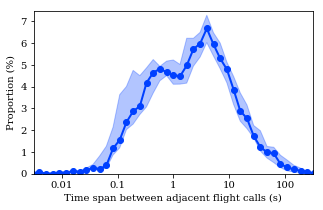

In [16]:
%matplotlib inline

sorted_y = np.sort(y, axis=1) * 100

fig, ax1 = plt.subplots(1, 1, sharex=True, figsize=(5, 3))

ax1.fill_between(
    x[1:],
    np.percentile(sorted_y, 25, axis=1),
    np.percentile(sorted_y, 75, axis=1),
    alpha=0.3, color="#0040FF");

ax1.plot(x[1:], 0.5 * (sorted_y[:, 2] + sorted_y[:, 3]), "-o", color="#0040FF", linewidth = 2.0);


ax1.set_xlim(bin_start + 0.5, bin_stop - 0.5)
ax1.set_xticks(range(1+bin_start, bin_stop))
ax1.set_xticklabels(["0.01", "0.1", "1", "10", "100"], family="serif")
ax1.set_xlabel("Time span between adjacent flight calls (s)", family="serif")

ax1.set_ylim(0, 7.5)
ax1.set_yticks(range(0, 8))
ax1.set_yticklabels(map(str, range(0, 8)), family="serif")
ax1.set_ylabel("Proportion (%)", family="serif")

plt.savefig("icassp_fig_inter-onset-intervals.png", bbox_inches='tight', dpi=144)

In [8]:
percents = [0.1, 1.0, 10.0, 15.0, 20.0, 25.0, 30.0, 50.0, 75.0, 99.0, 99.9]
percentiles = np.percentile(all_intervals, percents) * 1000
percentiles_str = [str(percentile) for percentile in percentiles]

for percent, percentile in zip(percents, percentiles):
    percent_str = str(percent).rjust(5)
    percentile_str = str(int(percentile)).rjust(6)
    print("{}% of the intervals are below {} ms".format(percent_str, percentile_str))

  0.1% of the intervals are below      3 ms
  1.0% of the intervals are below     29 ms
 10.0% of the intervals are below    142 ms
 15.0% of the intervals are below    204 ms
 20.0% of the intervals are below    290 ms
 25.0% of the intervals are below    395 ms
 30.0% of the intervals are below    529 ms
 50.0% of the intervals are below   1694 ms
 75.0% of the intervals are below   5360 ms
 99.0% of the intervals are below  72634 ms
 99.9% of the intervals are below 203242 ms


In [12]:
n_intervals = len(all_intervals)
print("Intervals below 100 ms: {:5.2f}%".format(100 * sum(all_intervals < 0.1) / n_intervals))
print("Intervals above 10 s: {:5.2f}%".format(100 * sum(all_intervals > 10.0) / n_intervals))

Intervals below 100 ms:  5.91%
Intervals above 10 s: 14.17%


In [13]:
5.91 + 14.17

20.08